In [1]:
import pandas as pd
import numpy as np

In [2]:
all_fights = pd.read_csv('Data Sets/Merged_Fights_Fighters.csv')
all_fights.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
all_fights.tail(10)

,event_place,f1result,f2result,f1fid,f2fid,method,method_d,ref,f1name,f1nick,...,f2nick,f2height,f2weight,f2association,f2class,f2locality,f2country,f1age,f2age,match_time
3559,"Consol Energy Center, Pittsburgh, Pennsylvania...",win,loss,58065,1326,Decision,Unanimous,Keith Peterson,Dennis Bermudez,The Menace,...,Crusher,67.0,145.0,T-Blood,Featherweight,"Inashiki, Ibaraki",Japan,30.0,38.0,15.000000
3560,"Consol Energy Center, Pittsburgh, Pennsylvania...",win,loss,17224,2765,TKO,Knees,Mario Yamasaki,Chris Camozzi,None,...,Diesel,72.0,170.0,MMA Lab,Welterweight,"Phoenix, Arizona",United States,30.0,34.0,0.433333
3561,"Consol Energy Center, Pittsburgh, Pennsylvania...",win,loss,31766,34625,Decision,Unanimous,Keith Peterson,James Krause,The James Krause,...,Shaolin,72.0,155.0,Toshido Mixed Martial Arts,Lightweight,"Kelowna, British Columbia",Canada,30.0,28.0,15.000000
3562,"Consol Energy Center, Pittsburgh, Pennsylvania...",win,loss,30452,54124,TKO,Punches,Bill Bookwalter,Sean Strickland,Tarzan,...,The Dominican Nightmare,69.0,171.0,Tristar Gym,Welterweight,"Montreal, Quebec",Canada,25.0,29.0,14.416667
3563,"Consol Energy Center, Pittsburgh, Pennsylvania...",win,loss,103153,17665,KO,Head Kick and Punches,James Chappell,Oluwale Bamgbose,The Holy War Angel,...,None,69.0,185.0,Power MMA,Middleweight,"Sao Paulo, Sao Paulo",Brazil,29.0,34.0,1.000000
3564,"Consol Energy Center, Pittsburgh, Pennsylvania...",win,loss,29470,14971,Decision,Unanimous,Chip Snider,Anthony Smith,Lionheart,...,Leleco,72.0,185.0,MMA Masters,Middleweight,"Salvador, Bahia",Brazil,28.0,34.0,15.000000
3565,"Consol Energy Center, Pittsburgh, Pennsylvania...",win,loss,25412,81634,Decision,Unanimous,Keith Peterson,Nathan Coy,Soulforce,...,Spyder,69.0,170.0,Renzo Gracie Philly,Welterweight,"Marlton, New Jersey",United States,38.0,27.0,15.000000
3566,"Consol Energy Center, Pittsburgh, Pennsylvania...",win,loss,75021,61266,Decision,Split,James Chappell,Ashlee Evans-Smith,None,...,The Bruiser,66.0,135.0,Elite Team,Bantamweight,"Visalia, California",United States,29.0,39.0,15.000000
3567,"Consol Energy Center, Pittsburgh, Pennsylvania...",win,loss,66725,117453,TKO,Elbows and Punches,Bill Bookwalter,Lauren Murphy,None,...,None,68.0,145.0,Nor-Cal Fighting Alliance,Featherweight,"Santa Rosa, California",United States,33.0,30.0,14.916667
3568,"Consol Energy Center, Pittsburgh, Pennsylvania...",win,loss,26808,58947,Decision,Unanimous,Chip Snider,Shamil Abdurakhimov,Abrek,...,Freight Train,77.0,253.0,Jackson-Wink MMA,Heavyweight,"Seattle, Washington",United States,35.0,36.0,15.000000


In [4]:
#mask to remove contested fights
mask_no_contest_1 = ((all_fights.method != 'No Contest - Hoffman Failed Drug Test') & 
                   (all_fights.method != 'No Contest - Overturned by State Commission') &
                    (all_fights.method != 'No') & (all_fights.method != "NC") & 
                    (all_fights.method != 'No Contest - Caceres Failed Drug Test') & 
                     (all_fights.method != 'No Contest - Overturned by Commission' ) & 
                     (all_fights.method !='No Contest') & (all_fights.method != 'Draw'))
# df_contested fights
fights = all_fights[mask_no_contest_1]

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
fights_by_class = fights.groupby(['f1class'])['method'].count()
fights_by_class = pd.DataFrame(fights_by_class)
fights_by_class = fights_by_class.reset_index()
fights_by_class.head()

,f1class,method
0,Atomweight,1
1,Bantamweight,264
2,Featherweight,347
3,Flyweight,125
4,Heavyweight,403


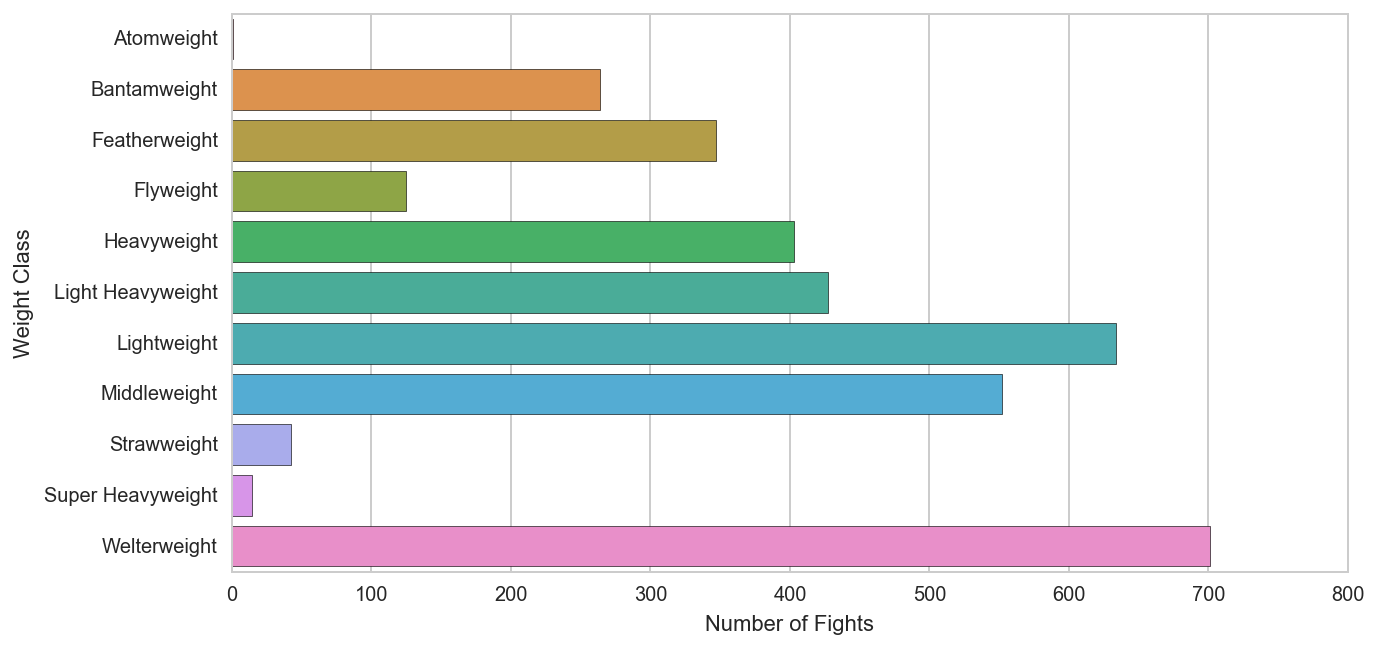

In [7]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'method', y = 'f1class', data = fights_by_class)
sns.axlabel(xlabel = 'Number of Fights', ylabel = 'Weight Class')

In [8]:
fights_by_dec = fights.groupby(['method'])['f1result'].count()
fights_by_dec = pd.DataFrame(fights_by_dec)
fights_by_dec = fights_by_dec.reset_index()
fights_by_dec.head()

,method,f1result
0,DQ,11
1,Decision,1470
2,KO,414
3,Submission,768
4,TKO,847


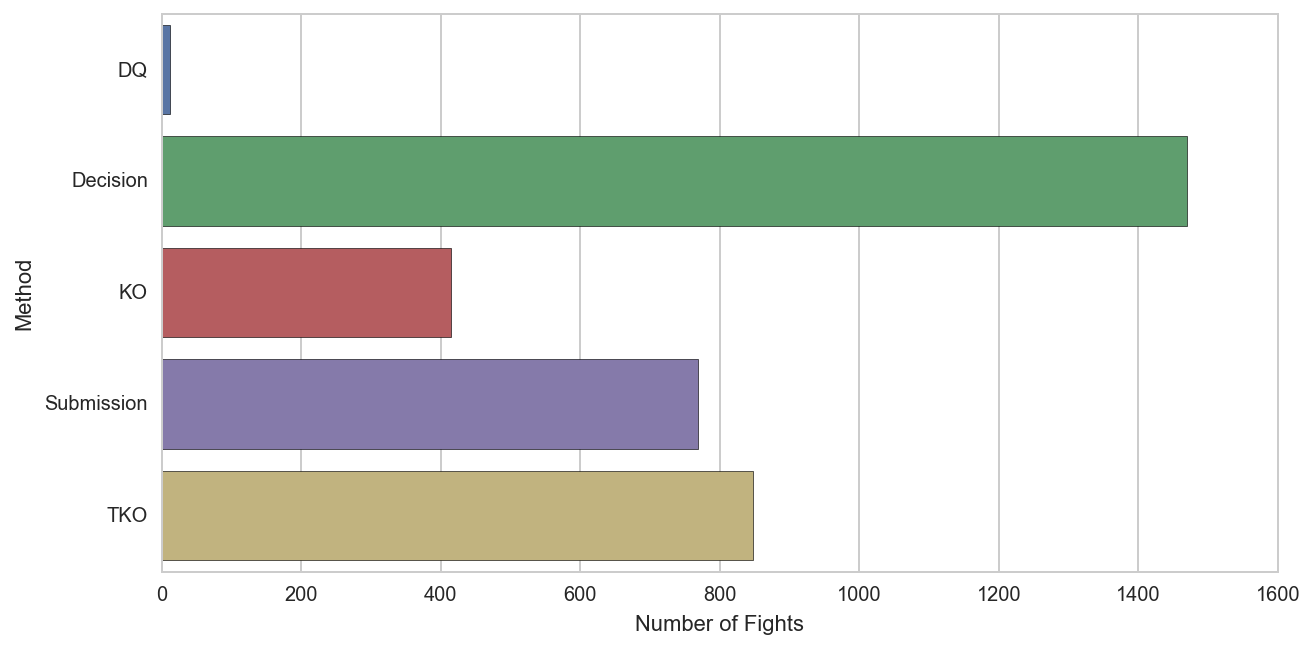

In [9]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'f1result', y = 'method', data = fights_by_dec)
sns.axlabel(xlabel = 'Number of Fights', ylabel = 'Method')

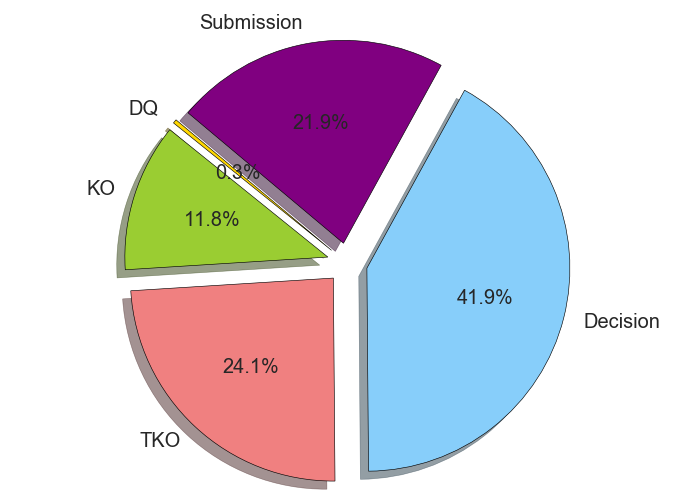

In [10]:
# Data to plot
labels = 'DQ', 'KO', 'TKO', 'Decision', 'Submission'
sizes = [11, 414, 847, 1470, 768]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple']
explode = (0.1, 0.1, 0.1, 0.1, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [11]:
fights.columns

Index([u'event_place', u'f1result', u'f2result', u'f1fid', u'f2fid', u'method',
       u'method_d', u'ref', u'f1name', u'f1nick', u'f1height', u'f1weight',
       u'f1association', u'f1class', u'f1locality', u'f1country', u'f2name',
       u'f2nick', u'f2height', u'f2weight', u'f2association', u'f2class',
       u'f2locality', u'f2country', u'f1age', u'f2age', u'match_time'],
      dtype='object')

In [12]:
method_code = []
for method in fights['method']:
    if method == 'Decision':
        x = 0
    elif method == 'TKO':
        x = 1
    elif method == 'Submission':
        x = 2
    elif method == 'KO':
        x = 3
    elif method == 'DQ':
        x = 4
    method_code.append(x)


In [13]:
fights['method_code'] = method_code
fights['method_code'].value_counts()

/Users/mikesanders/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


0    1470
1     847
2     768
3     414
4      11
Name: method_code, dtype: int64

In [14]:
#Starting my models
import statsmodels.formula.api as smf
import patsy
formula = 'method_code ~ C(event_place) + C(ref) + C(f1name) + f1height + f1weight + C(f1association) + C(f1class) + C(f1locality) + C(f1country) + C(f2name) + f2height + f2weight + C(f2association) + C(f2class) + C(f2locality) + C(f2country) + f1age + f2age - 1'
Y,X = patsy.dmatrices(formula, data=fights, return_type = "dataframe")
y = np.ravel(Y)
print X.shape
print y.shape

(3510, 5300)
(3510,)


In [15]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [16]:
from sklearn.linear_model import LogisticRegressionCV
lrcv = LogisticRegressionCV()
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier()
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
from sklearn.svm import SVC
svc = SVC()

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
# lrcv_scores = cross_val_score(lrcv,X,y,cv=5)
# print lrcv_scores
# print np.mean(lrcv_scores)

In [19]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

Cs = 1.0/np.logspace(-1,4,20)

search_parameters_lr = {
    'penalty': ['l1','l2'],
    'C': Cs,
    'class_weight': [None, 'balanced'],
    'solver': ['liblinear'],
    'n_jobs': [4]
    }

lr_est = GridSearchCV(lr, search_parameters_lr, cv=5)

In [20]:
lr_grid = lr_est.fit(X,y)
print lr_grid.best_params_
print lr_grid.best_score_


{'penalty': 'l2', 'C': 0.00033598182862837811, 'n_jobs': 4, 'solver': 'liblinear', 'class_weight': None}
0.438461538462


In [21]:
lr_best = LogisticRegression(penalty= 'l2', C= 0.00033598182862837811, n_jobs = 4, solver= 'liblinear', class_weight= None)

In [22]:
lr_best.fit(X,y)

LogisticRegression(C=0.000335981828628, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=4, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

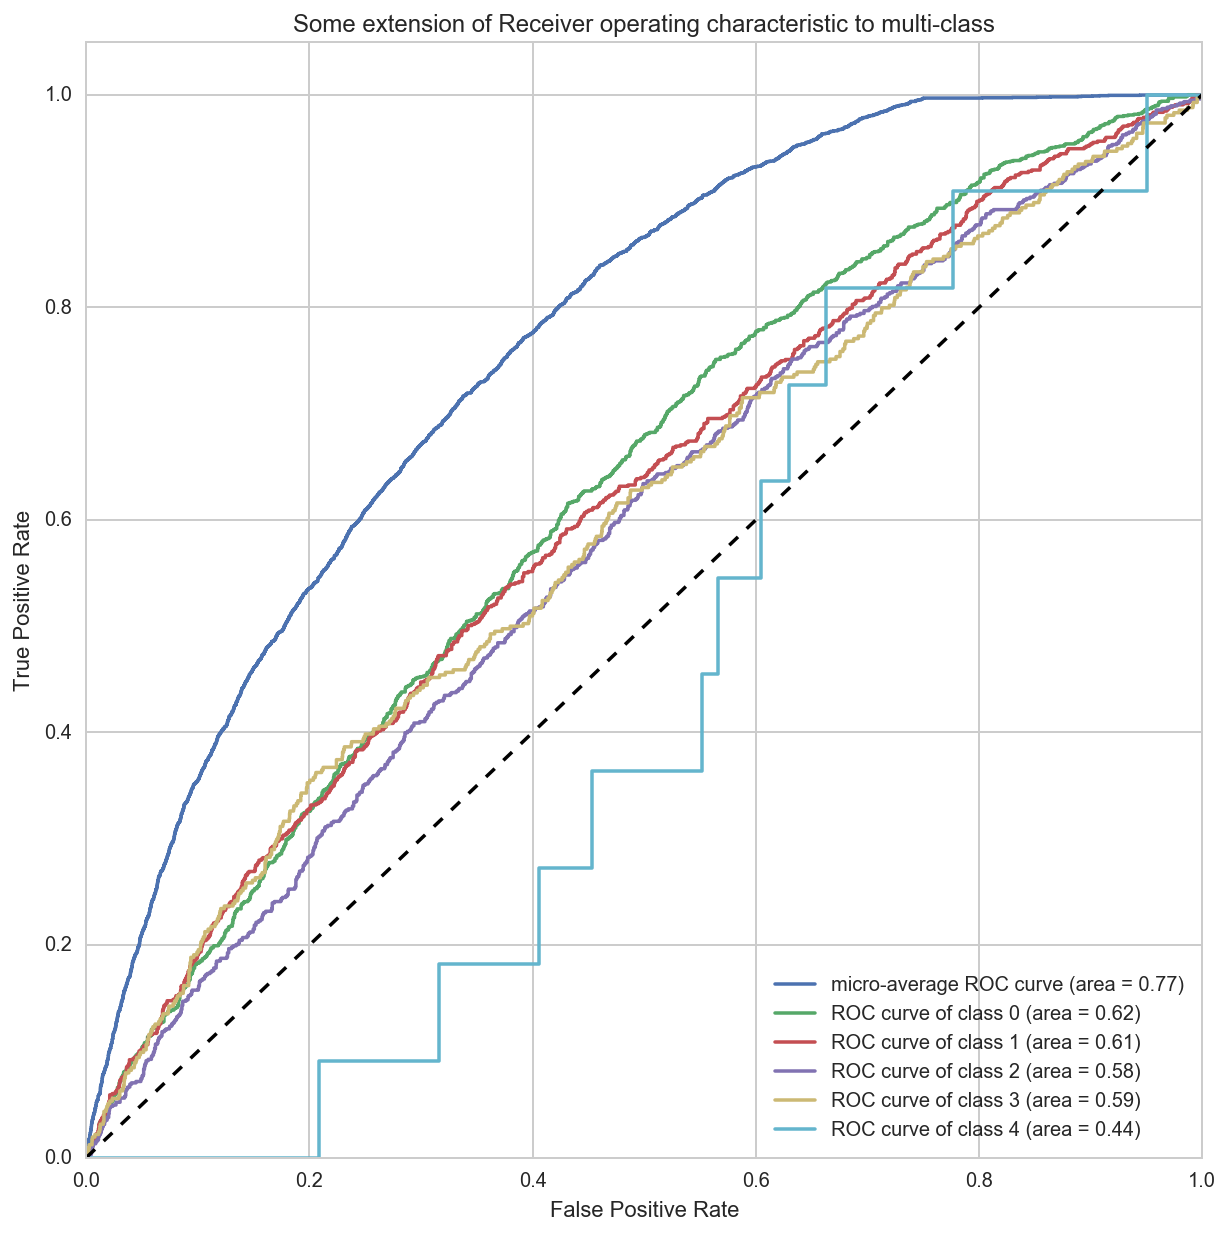

In [23]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
class multi_roc:
    
    # model / estimator
    estimator = False
    
    
    def __init__(self, estimator):
        self.estimator = estimator
        
        if "classes_" not in vars(estimator):
            raise Exception("EstimatorError", "Estimator has no fit data.  Run .fit()")
                            
    def plot(self, X_test, y_test, filter_class=False, figsize=(10,10)):
        _ = ""
        
        y_score = self.estimator.decision_function(X_test)
        y = label_binarize(y_test, classes=self.estimator.classes_)
        
        n_classes = y.shape[1]
        
        fpr = dict()
        tpr = dict()
        
        roc_auc = dict()
        
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
            roc_auc[self.estimator.classes_[i]] = auc(fpr[i], tpr[i])
        
        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        
        if filter_class:
            # Plot of a ROC curve for a specific class
            figure = plt.figure()
            figure.set_size_inches(figsize[0], figsize[1])
            plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2], figsize=(10,10))
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver operating characteristic example')
            plt.legend(loc="lower right")
            plt.show()
            
            return
        
        # Plot ROC curve
        plt.figure(figsize=figsize)
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]))
        
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                           ''.format(i, roc_auc[i]))
        
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Some extension of Receiver operating characteristic to multi-class')
        plt.legend(loc="lower right")
        plt.show()

        


roc = multi_roc(estimator = lr_best)
roc.plot(X, y, figsize=(10,10))

In [24]:
y_pred_lr = lr_best.predict(X)

In [25]:
print classification_report(y, y_pred_lr)

             precision    recall  f1-score   support

        0.0       0.45      0.93      0.61      1470
        1.0       0.37      0.22      0.27       847
        2.0       0.00      0.00      0.00       768
        3.0       0.00      0.00      0.00       414
        4.0       0.00      0.00      0.00        11

avg / total       0.28      0.44      0.32      3510



/Users/mikesanders/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
# sgdc.fit(X_train,y_train)
# sgdc.score(X_test,y_test)

In [27]:
# sgdc_scores = cross_val_score(sgdc,X,y,cv=10)
# print sgdc_scores
# print np.mean(sgdc_scores)

In [28]:

#l1_ratio = np.logspace(-5,1, 20)

search_parameters_sgdc = {
    'loss': ['log'],
    'penalty': [None, 'l2', 'l1', 'elasticnet'],
    'l1_ratio': [0,.25,.5,.75,1],
    'n_iter': [1,2,3,4,5],
    'shuffle': [True, False]
    }

sgdc_est = GridSearchCV(sgdc, search_parameters_sgdc, cv=5)

In [29]:
sgdc_grid = sgdc_est.fit(X,y)
print sgdc_grid.best_params_
print sgdc_grid.best_score_

{'penalty': 'l1', 'l1_ratio': 0.25, 'n_iter': 5, 'shuffle': True, 'loss': 'log'}
0.420512820513


In [70]:
sgdc_best = SGDClassifier(penalty = 'l1', l1_ratio= 0.25, n_iter = 5, shuffle =  True, loss =  'log')

In [71]:
sgdc_best.fit(X,y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.25,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l1', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

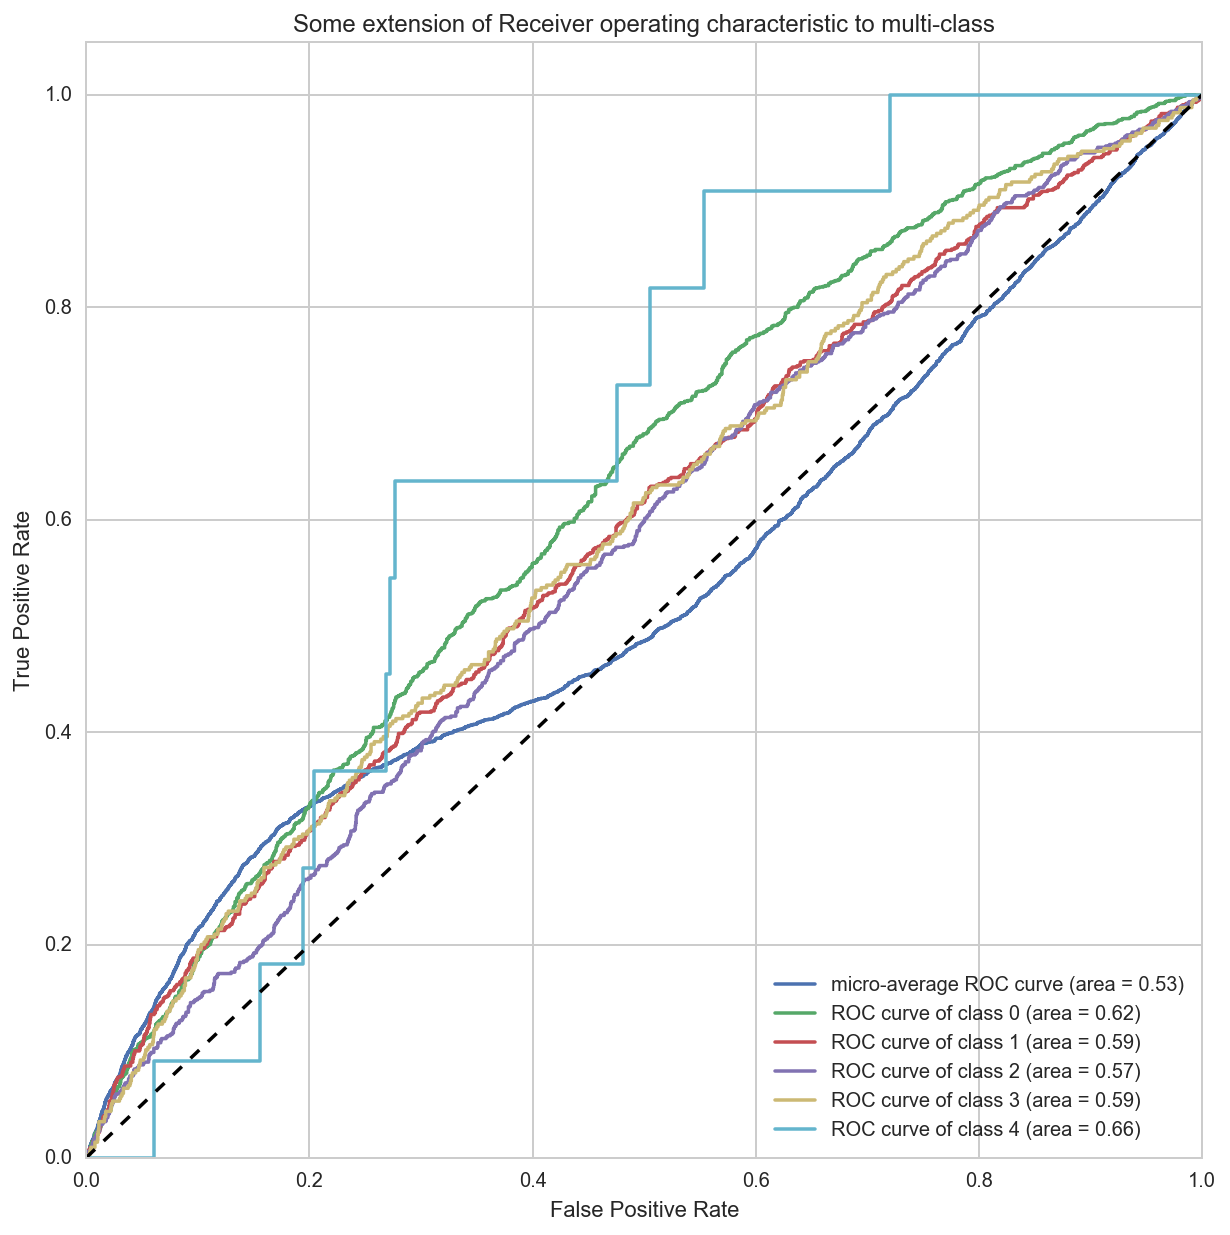

In [72]:
roc = multi_roc(estimator = sgdc_best)
roc.plot(X, y, figsize=(10,10))

In [73]:
y_pred_lr = sgdc_best.predict(X)
print classification_report(y, y_pred_lr)

             precision    recall  f1-score   support

        0.0       0.53      0.42      0.47      1470
        1.0       0.32      0.09      0.14       847
        2.0       0.33      0.10      0.15       768
        3.0       0.15      0.52      0.23       414
        4.0       0.01      0.27      0.02        11

avg / total       0.39      0.28      0.29      3510



In [33]:
# knn_scores = cross_val_score(knn,X,y,cv=10)
# print knn_scores
# print np.mean(knn_scores)

In [78]:
from sklearn.grid_search import GridSearchCV

search_parameters_knn = {
    
    'weights': ['uniform', 'distance'],
    'algorithm' : ['auto'],
    'leaf_size': [5, 10],
    'n_neighbors': [6, 7],
    'n_jobs': [4],
    'p': [2],
    'metric': ['minkowski']
    }

knn_est = GridSearchCV(knn, search_parameters_knn, cv=5)

In [79]:
knn_grid = knn_est.fit(X,y)
print knn_grid.best_params_
print knn_grid.best_score_

{'n_neighbors': 7, 'n_jobs': 4, 'algorithm': 'auto', 'metric': 'minkowski', 'p': 2, 'weights': 'uniform', 'leaf_size': 5}
0.370655270655


In [80]:
knn_best = KNeighborsClassifier(weights = 'uniform' , algorithm = 'auto', leaf_size = 5 , n_neighbors = 7 , n_jobs = 4, p = 2,  metric = 'minkowski')

In [81]:
knn_best.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=7, p=2,
           weights='uniform')

In [82]:
y_pred_knn = knn_best.predict(X)

In [83]:
print classification_report(y, y_pred_knn)

             precision    recall  f1-score   support

        0.0       0.54      0.85      0.66      1470
        1.0       0.50      0.38      0.43       847
        2.0       0.53      0.31      0.39       768
        3.0       0.52      0.11      0.19       414
        4.0       0.00      0.00      0.00        11

avg / total       0.52      0.53      0.49      3510



In [40]:
# DTC.fit(X_train, y_train)

In [41]:
# dtc_scores = cross_val_score(DTC,X,y,cv=10)
# print dtc_scores
# print np.mean(dtc_scores)

In [42]:
search_parameters_dtc = {
    
    'criterion': ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth': [1,3,5, None],
    'max_features': ['auto', 'sqrt', 'log2', None]
    }

dtc_est = GridSearchCV(DTC, search_parameters_dtc, cv=5)

In [43]:
dtc_grid = dtc_est.fit(X,y)
print dtc_grid.best_params_
print dtc_grid.best_score_

{'max_features': None, 'splitter': 'random', 'criterion': 'gini', 'max_depth': 1}
0.436182336182


In [84]:
dtc_best = DecisionTreeClassifier(max_features= None, splitter ='random', criterion =  'gini', max_depth = 1)
dtc_best.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')

In [85]:
y_pred_dtc = dtc_best.predict(X)

In [86]:
print classification_report(y, y_pred_dtc)

             precision    recall  f1-score   support

        0.0       0.45      0.94      0.60      1470
        1.0       0.37      0.17      0.24       847
        2.0       0.00      0.00      0.00       768
        3.0       0.00      0.00      0.00       414
        4.0       0.00      0.00      0.00        11

avg / total       0.28      0.44      0.31      3510



In [47]:
# bag_knn = BaggingClassifier(knn_best)
# bag_dtc = BaggingClassifier(dtc_best)

In [48]:
# bag_knn_scores = cross_val_score(bag_knn,X,y,cv=10)
# bag_dtc_scores = cross_val_score(bag_dtc,X,y,cv=10)
# print np.mean(bag_knn_scores)
# print np.mean(bag_dtc_scores)

In [49]:
# search_parameters_bag = {
#     'base_estimator':[knn_best, dtc_best], 
#     'n_estimators':[8,10,12,50],
#     'max_samples': [.25, .5, .75, 1],
#     'max_features': [25, .5, .75, 1],
#     'n_jobs': [4]
# }

# bag_est = GridSearchCV(bag, search_parameters_bag, cv=5)

In [50]:
# bag_grid = bag_est.fit(X,y)
# print bag_grid.best_params_
# print bag_grid.best_score_

In [51]:
# rfc.fit(X_train,y_train)
# rfc.score(X_train,y_train)

In [52]:
# rfc_scores = cross_val_score(rfc,X,y,cv=10)
# print np.mean(rfc_scores)

In [53]:
search_parameters_rfc = {
    'n_estimators': [10,20,30],
    'criterion': ['gini', 'entropy'],
    'max_depth': [1,3,5, None],
    'max_features': ['auto', 'sqrt', 'log2', None]
    }
rfc_est = GridSearchCV(rfc, search_parameters_rfc, cv=5)

In [54]:
rfc_grid = rfc_est.fit(X,y)
print rfc_grid.best_params_
print rfc_grid.best_score_

{'max_features': None, 'n_estimators': 20, 'criterion': 'gini', 'max_depth': 1}
0.433903133903


In [87]:
rfc_best = RandomForestClassifier(max_features= None, n_estimators = 20, criterion = 'gini', max_depth = 1)

In [88]:
rfc_best.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [89]:
y_pred_rfc = rfc_best.predict(X)

In [90]:
print classification_report(y, y_pred_rfc)

             precision    recall  f1-score   support

        0.0       0.46      0.85      0.60      1470
        1.0       0.35      0.34      0.34       847
        2.0       0.00      0.00      0.00       768
        3.0       0.00      0.00      0.00       414
        4.0       0.00      0.00      0.00        11

avg / total       0.28      0.44      0.33      3510



In [59]:
# svc.fit(X_train, y_train)
# svc.score(X_train, y_train)

In [60]:
search_parameters_SVC = {
    'kernel':['linear', 'rbf'], 
    'C':[3, 10, 13],
}

svc_est = GridSearchCV(svc, search_parameters_SVC, cv=5)

In [61]:
svc_grid = svc_est.fit(X,y)
print svc_grid.best_params_
print svc_grid.best_score_

{'kernel': 'rbf', 'C': 3}
0.430199430199


In [91]:
svc_best = SVC(kernel = 'rbf', C=3)

In [119]:
svc_best.fit(X,y)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [93]:
y_pred_svc = svc_best.predict(X)

In [94]:
print classification_report(y, y_pred_svc)

             precision    recall  f1-score   support

        0.0       0.45      0.94      0.61      1470
        1.0       0.38      0.19      0.26       847
        2.0       1.00      0.00      0.01       768
        3.0       1.00      0.01      0.01       414
        4.0       0.00      0.00      0.00        11

avg / total       0.62      0.44      0.32      3510



In [68]:
# from sklearn.ensemble import GradientBoostingClassifier
# gb = GradientBoostingClassifier()

# search_params_gb = {
#     'loss':  ['deviance', 'exponential'],
#     'learning_rate': [.1,.4,.7,1.],
#     'n_estimators': [10,50,100],
#     'max_depth': [1,2,3,4,5, None],
# }
# gb_est = GridSearchCV(gb, search_params_gb, cv=5)

In [69]:
# gd_grid = gb_est.fit(X,y)
# print gb_grid.best_params_
# print gb_grid.best_score_

In [ ]:
# gb_scores = cross_val_score(gb, X,y, cv=5)

In [ ]:
# np.mean(gb_scores)

In [112]:
ufc199 = pd.read_csv('Data Sets/UFC199.csv', parse_dates = ['event_date', 'birth_date', 'birth_date.1'])

In [113]:
ufc199.head()

,event_location,event_date,ref,method,method_code,f1id,f1name,f1nick,birth_date,f1height,...,f2fid,f2name,f2nick,birth_date.1,f2height,f2weight,f2association,f2class,f2locality,f2country
0,"The Forum, Inglewood, California, United States",2016-06-04,John McCarthy,Unknown,Unknown,10196.0,Michael Bisping,The Count,1979-02-28,74.0,...,23345.0,Luke Rockhold,None,1984-10-17,75.0,185.0,American Kickboxing Academy,Middleweight,"San Jose, California",United States
1,"The Forum, Inglewood, California, United States",2016-06-04,Herb Dean,Unknown,Unknown,12107.0,Dominick Cruz,The Dominator,1985-09-03,68.0,...,8847.0,Urijah Faber,The California Kid,1979-05-14,66.0,135.0,Team Alpha Male,Bantamweight,"Sacramento, California",United States
2,"The Forum, Inglewood, California, United States",2016-06-04,John McCarthy,Unknown,Unknown,38671.0,Max Holloway,Blessed,1991-12-04,71.0,...,32051.0,Ricardo Lamas,The Bully,1982-05-21,68.0,145.0,MMA Masters,Featherweight,"Chicago, Illinois",United States
3,"The Forum, Inglewood, California, United States",2016-06-04,Herb Dean,Unknown,Unknown,195.0,Dan Henderson,Hendo,1970-08-24,73.0,...,11292.0,Hector Lombard,Showeather,1978-02-02,69.0,170.0,American Top Team,Welterweight,Matanzas,Cuba
4,"The Forum, Inglewood, California, United States",2016-06-04,Jason Herzog,Unknown,Unknown,50529.0,Dustin Poirier,The Diamond,1989-01-19,69.0,...,27953.0,Bobby Green,King,1986-09-09,70.0,155.0,Pinnacle Fighting Systems,Lightweight,"Redlands, California",United States


In [114]:
ufc199['f1age'] = pd.DatetimeIndex(ufc199['event_date']).year - pd.DatetimeIndex(ufc199['birth_date']).year
ufc199['f2age'] = pd.DatetimeIndex(ufc199['event_date']).year - pd.DatetimeIndex(ufc199['birth_date.1']).year

In [115]:
ufc199.drop((['event_date', 'birth_date', 'birth_date', 'f1id', 'f2fid']), axis=1, inplace=True)

In [116]:
ufc199.columns

Index([u'event_location', u'ref', u'method', u'method_code', u'f1name',
       u'f1nick', u'f1height', u'f1weight', u'f1association', u'f1class',
       u'f1locality', u'f1country', u'f2name', u'f2nick', u'birth_date.1',
       u'f2height', u'f2weight', u'f2association', u'f2class', u'f2locality',
       u'f2country', u'f1age', u'f2age'],
      dtype='object')

In [120]:
formula199 = 'method_code ~ C(event_location) + C(ref) + C(f1name) + f1height + f1weight + C(f1association) + C(f1class) + C(f1locality) + C(f1country) + C(f2name) + f2height + f2weight + C(f2association) + C(f2class) + C(f2locality) + C(f2country) + f1age + f2age - 1'
Y199, X199 = patsy.dmatrices(formula199, data=ufc199, return_type = "dataframe")
print X199.shape

(11, 98)


In [118]:
svc_best.predict(X199)

ValueError: X.shape[1] = 98 should be equal to 5300, the number of features at training time